In [1]:
import numpy as np  # This libary is used to do maths faster and in fewer lines of code. Most of scientifiy python is based on it.
import matplotlib.pyplot as plt # This one is used to generate the graph. 
%matplotlib inline
# This means make the graph in notebook mode so it is displayed properly.

In [2]:
# Set up our variables
# Change these and see what happens 
population       = 1.0   
infection_rate   = 1.6   # The rate at which people are infected in terms of the number of people infected.
recovery_rate    = 0.15  # The rate at which people recover in terms of the number of people infected. 
infected         = 0.01  # The proportion of the population infected.
susceptible      = population - infected
recovered        = 0     # The proportion of the population that have been infected and recovered (assumed to be immune).
time             = 0     
dt               = 0.05   
max_time         = 25

In [3]:
# Setting up the differntial equations
def susceptible_diff(infection_rate, infected, susceptible):
    # Change the number of people susceptible by removing the people who would have been infected.
    return -1 * infection_rate * infected * susceptible 

def infected_diff(infection_rate, recovery_rate, infected, susceptible):
    # Change the number infected by adding the people from the susceptible population who just got infected and removing the
    # ones that have just recovered.
    return (infection_rate * susceptible * infected) - (recovery_rate * infected)

def recovered_diff(recovery_rate, infected):
    # Change the number recovered by adding the number of people who just recovered. 
    return recovery_rate * infected

In [4]:
log = np.zeros((int(max_time/dt),4)) # This is setting up a 2 dimensional array to track the values over time so that they can 
                                     # be graphed later. 
index = 0

while time <= max_time:
    susceptible  += susceptible_diff(infection_rate, infected, susceptible)              * dt # Adding the calcuated values,
    infected     += infected_diff(infection_rate, recovery_rate, infected, susceptible)  * dt # multiplied by dt.
    recovered    += recovered_diff(recovery_rate, infected)                              * dt
    time         += dt
    
    log[index] = (time, susceptible, infected, recovered)
    index += 1

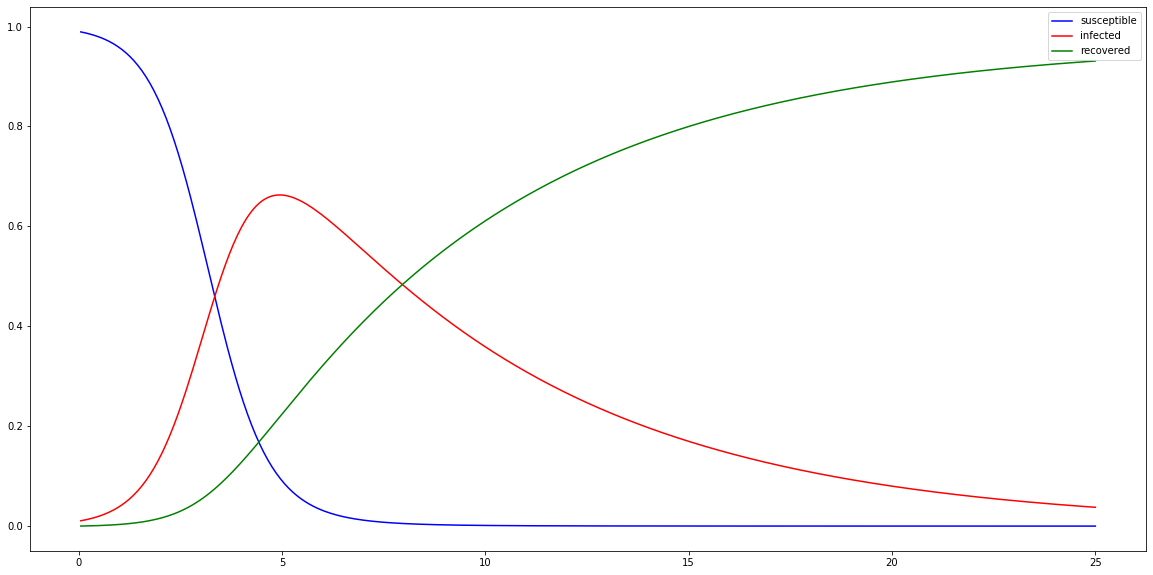

In [15]:
# Graphing the values over time. 
plt.plot(log[:,0], log[:,1], color = "blue")  # Suceptible
plt.plot(log[:,0], log[:,2], color = "red")   # Infected
plt.plot(log[:,0], log[:,3], color = "green") # Recovered
_  = plt.legend(["susceptible","infected","recovered"])

The flowchart for the program looks like this:

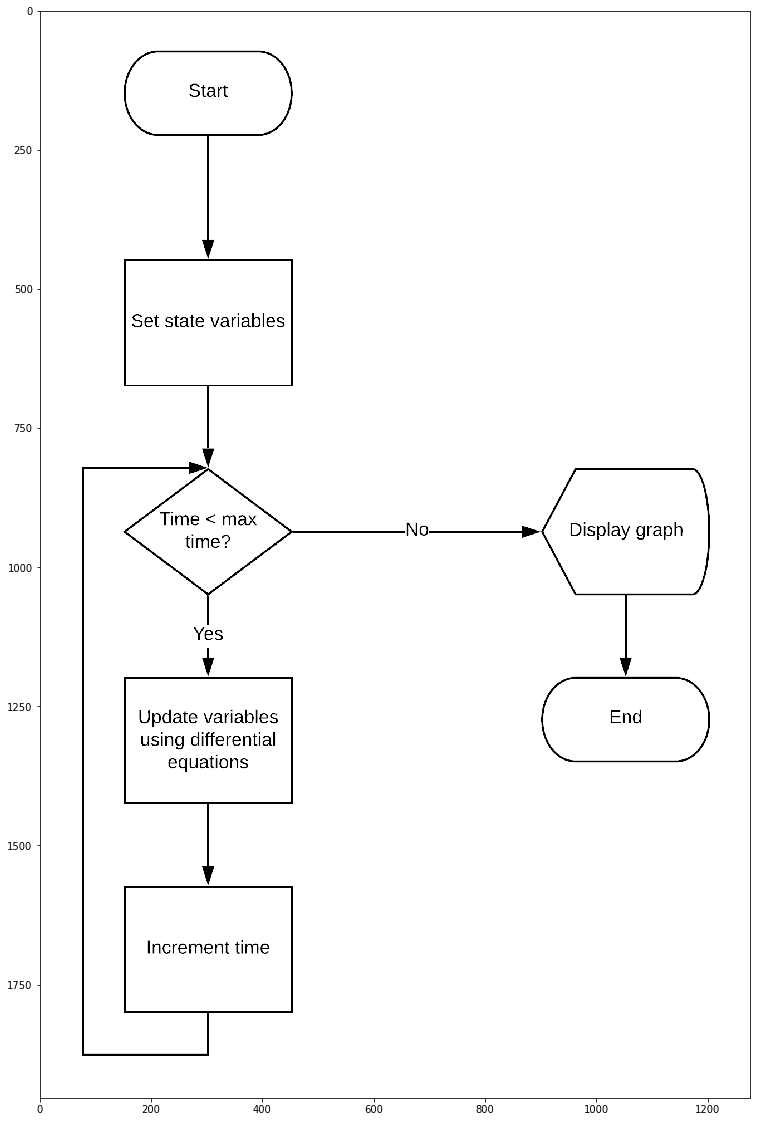

In [16]:
import matplotlib.image as mpimage
_ = plt.imshow(mpimage.imread("./assets/Epidemic-Flowchart.png"))